In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dynamic Analysis/EMG/Trial_3_p_Gait_11.txt', sep="\t", skiprows=1, header=None)

columns = ['Time(s)', 'R.Med. Gastro(μV)', 'R.Tib.Ant.(μV)', 'R.Rectus Fem.(μV)', 'R.Biceps Fem.(μV)', 'Empty']

df.columns = columns


# normalize time column from 0 % to 100 %
df['Time(%)'] = (df['Time(s)'] - df['Time(s)'].min()) / (df['Time(s)'].max() - df['Time(s)'].min()) * 100

df.head()

,Time(s),R.Med. Gastro(μV),R.Tib.Ant.(μV),R.Rectus Fem.(μV),R.Biceps Fem.(μV),Empty,Time(%)
0,0.0000,5.49138,932.99921,8.76506,43.10352,,0.000000
1,0.0005,5.23265,921.33179,8.76324,43.22324,,0.039062
2,0.0010,5.05341,905.90363,8.77156,43.11775,,0.078125
3,0.0015,5.12817,886.48346,8.77841,42.77274,,0.117188
4,0.0020,5.59836,863.42816,8.78186,42.21330,,0.156250


<Axes: title={'center': 'Gait EMG Data'}, xlabel='Time (%)', ylabel='EMG (μV)'>

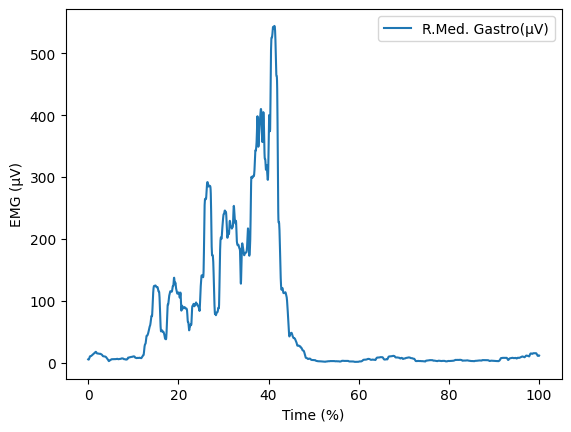

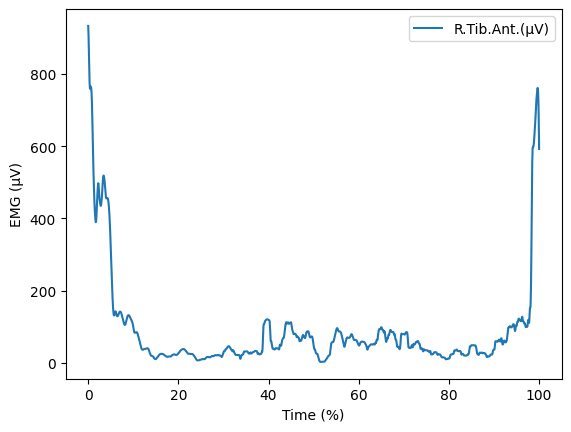

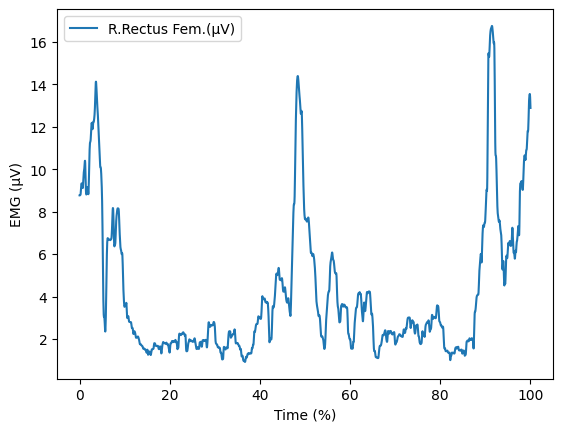

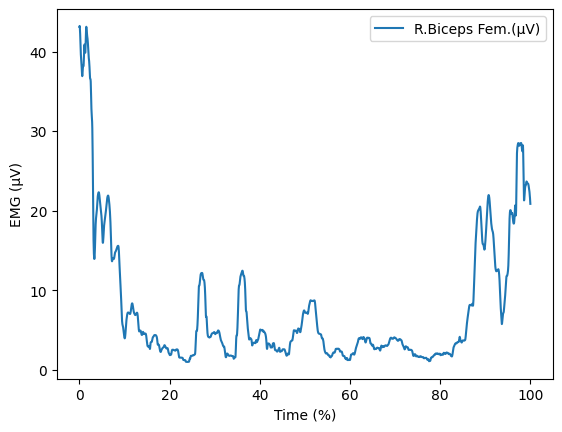

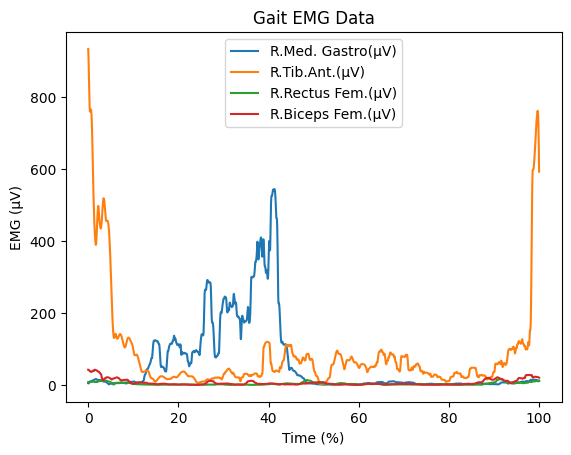

In [3]:
df.plot(x='Time(%)', y=columns[1], xlabel='Time (%)', ylabel='EMG (μV)')
df.plot(x='Time(%)', y=columns[2], xlabel='Time (%)', ylabel='EMG (μV)')
df.plot(x='Time(%)', y=columns[3], xlabel='Time (%)', ylabel='EMG (μV)')
df.plot(x='Time(%)', y=columns[4], xlabel='Time (%)', ylabel='EMG (μV)')

# plot all muscles in one plot for plank
df.plot(x='Time(%)', y=columns[1:5], xlabel='Time (%)', ylabel='EMG (μV)', title='Gait EMG Data')

In [4]:
df_plank = pd.read_csv('Dynamic Analysis/EMG/Trial_16p_Mov_1.txt', sep="\t", skiprows=1, header=None)

df_plank.columns = columns

# normalize time column from 0 % to 100 %
df_plank['Time(%)'] = (df_plank['Time(s)'] - df_plank['Time(s)'].min()) / (df_plank['Time(s)'].max() - df_plank['Time(s)'].min()) * 100

df_plank.head()

,Time(s),R.Med. Gastro(μV),R.Tib.Ant.(μV),R.Rectus Fem.(μV),R.Biceps Fem.(μV),Empty,Time(%)
0,0.0000,41.41764,71.45050,863.21802,18.11473,,0.000000
1,0.0005,42.19603,71.40408,912.96179,17.04283,,0.017730
2,0.0010,43.20927,71.41306,932.89850,16.16717,,0.035461
3,0.0015,44.39908,71.29906,935.44092,15.71665,,0.053191
4,0.0020,45.74557,70.96524,933.47064,15.68001,,0.070922


<Axes: title={'center': 'Plank EMG Data'}, xlabel='Time (%)', ylabel='EMG (μV)'>

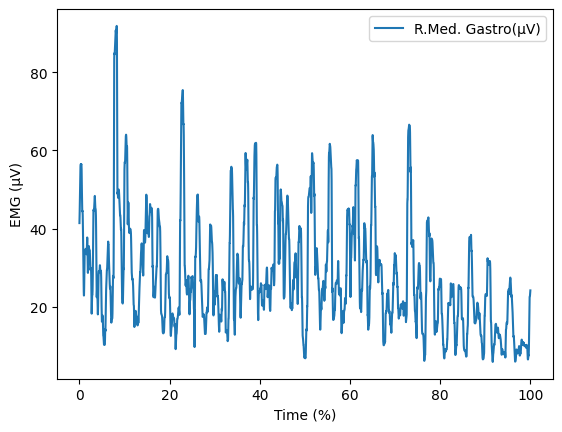

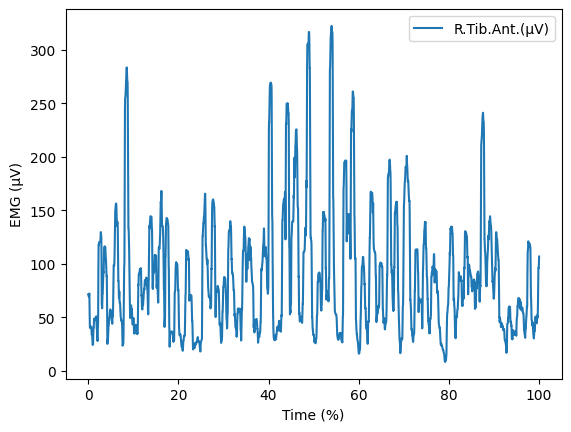

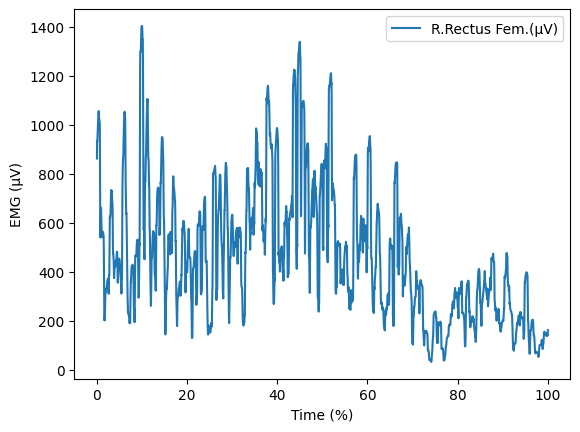

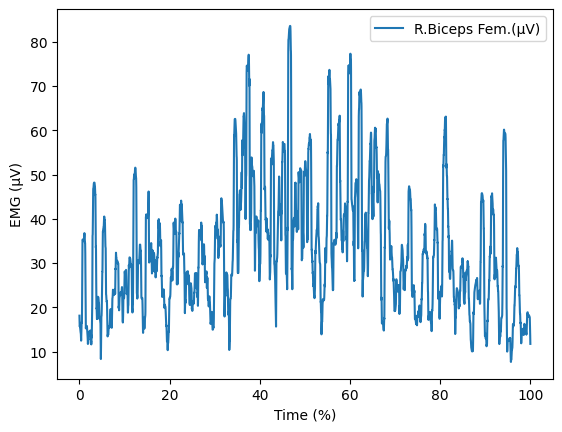

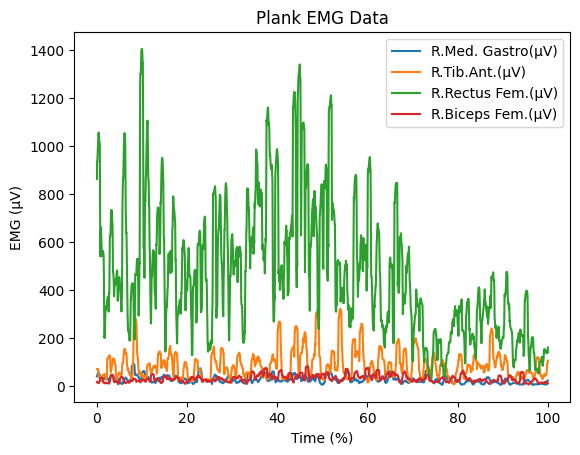

In [5]:
df_plank.plot(x='Time(%)', y=columns[1], xlabel='Time (%)', ylabel='EMG (μV)')
df_plank.plot(x='Time(%)', y=columns[2], xlabel='Time (%)', ylabel='EMG (μV)')
df_plank.plot(x='Time(%)', y=columns[3], xlabel='Time (%)', ylabel='EMG (μV)')
df_plank.plot(x='Time(%)', y=columns[4], xlabel='Time (%)', ylabel='EMG (μV)')

# plot all muscles in one plot for plank
df_plank.plot(x='Time(%)', y=columns[1:5], xlabel='Time (%)', ylabel='EMG (μV)', title='Plank EMG Data')

In [6]:
# apply 10 Hz lowpass butterworth filter to EMG data
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter specifications
cutoff = 10  # desired cutoff frequency of the filter, Hz
fs = 2000.0    # sample rate, Hz
order = 4     # order of the filter
# Apply filter to each muscle column
for col in columns[1:5]:
    df[col] = butter_lowpass_filter(df[col], cutoff, fs, order)
    df_plank[col] = butter_lowpass_filter(df_plank[col], cutoff, fs, order)

<Axes: title={'center': 'Filtered Gait EMG Data'}, xlabel='Time (%)', ylabel='EMG (μV)'>

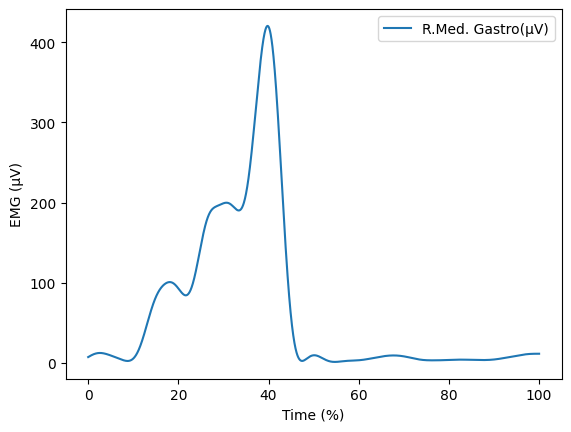

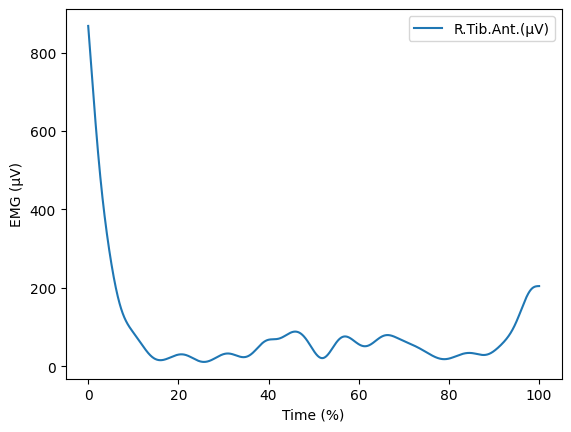

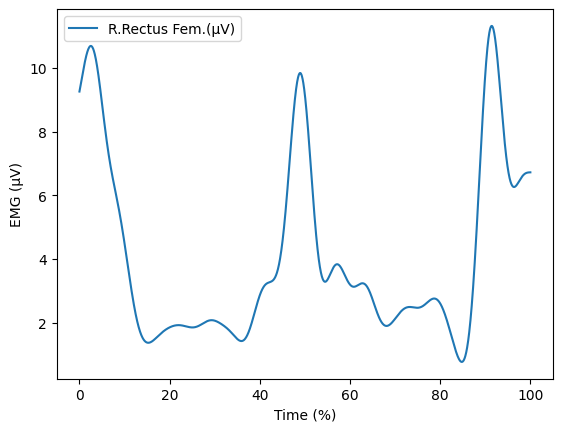

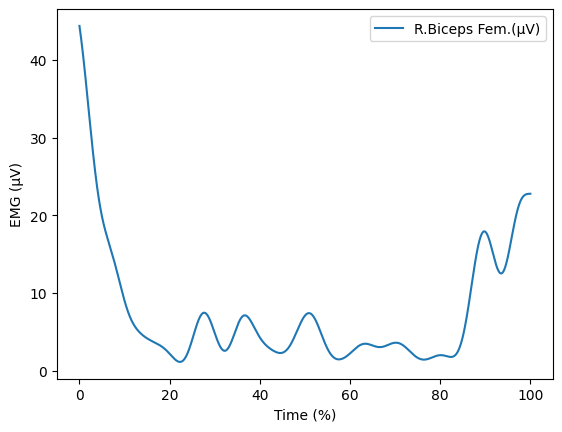

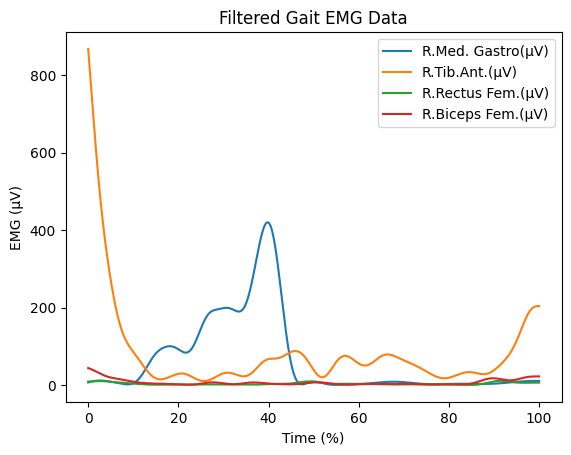

In [7]:
# plot filtered data for gait
df.plot(x='Time(%)', y=columns[1], xlabel='Time (%)', ylabel='EMG (μV)')
df.plot(x='Time(%)', y=columns[2], xlabel='Time (%)', ylabel='EMG (μV)')
df.plot(x='Time(%)', y=columns[3], xlabel='Time (%)', ylabel='EMG (μV)')
df.plot(x='Time(%)', y=columns[4], xlabel='Time (%)', ylabel='EMG (μV)')
# plot all muscles in one plot for gait
df.plot(x='Time(%)', y=columns[1:5], xlabel='Time (%)', ylabel='EMG (μV)', title='Filtered Gait EMG Data')
#

<Axes: title={'center': 'Filtered Plank EMG Data'}, xlabel='Time (%)', ylabel='EMG (μV)'>

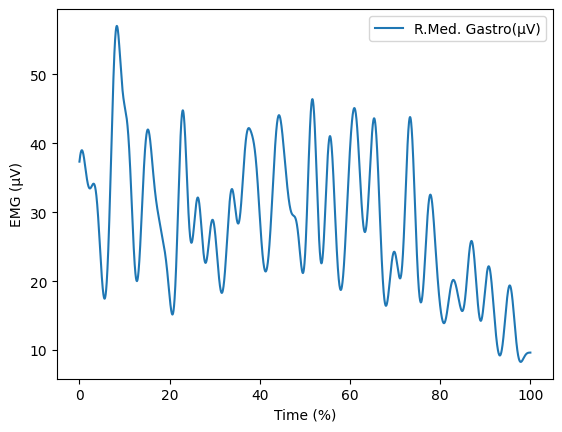

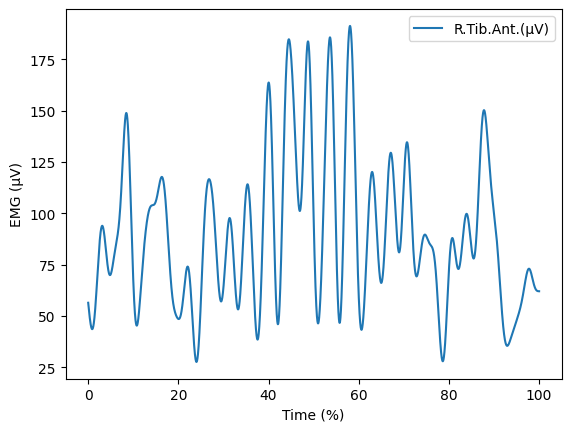

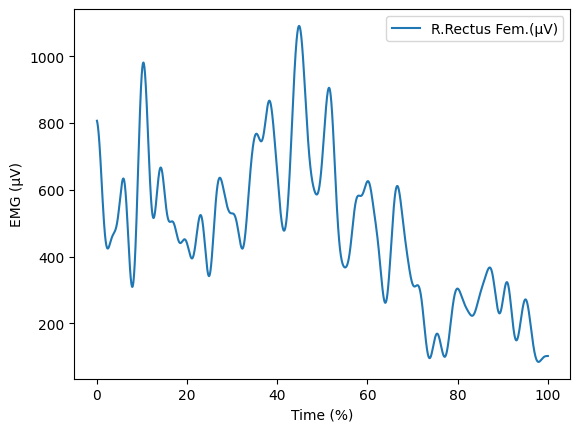

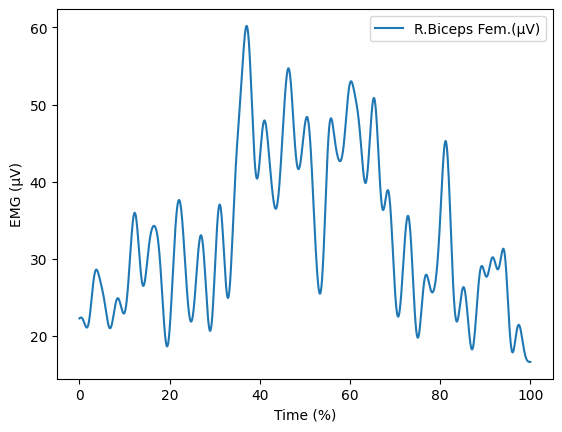

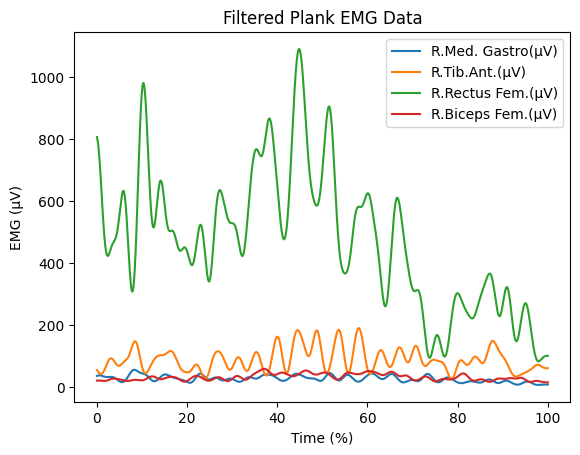

In [8]:
# plot filtered data for plank
df_plank.plot(x='Time(%)', y=columns[1], xlabel='Time (%)', ylabel='EMG (μV)')
df_plank.plot(x='Time(%)', y=columns[2], xlabel='Time (%)', ylabel='EMG (μV)')
df_plank.plot(x='Time(%)', y=columns[3], xlabel='Time (%)', ylabel='EMG (μV)')
df_plank.plot(x='Time(%)', y=columns[4], xlabel='Time (%)', ylabel='EMG (μV)')
# plot all muscles in one plot for plank
df_plank.plot(x='Time(%)', y=columns[1:5], xlabel='Time (%)', ylabel='EMG (μV)', title='Filtered Plank EMG Data')